In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

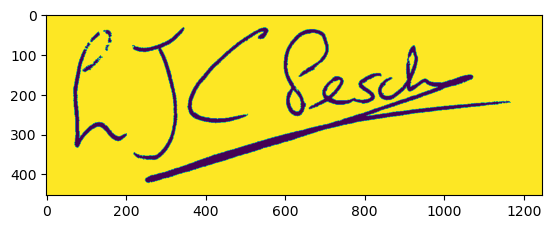

In [7]:
img = plt.imread(r"handwritten datasets/sample_Signature/sample_Signature/forged/NFI-00301001.png")
plt.imshow(img)

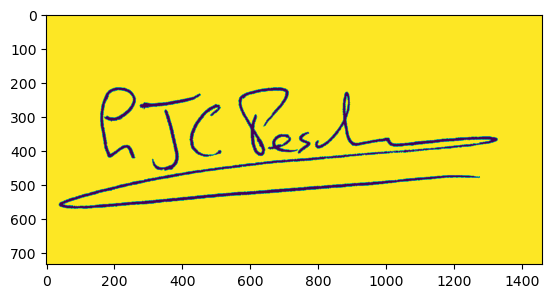

In [24]:
img1 = plt.imread(r"handwritten datasets/sample_Signature/sample_Signature/genuine/NFI-00101001.png")
plt.imshow(img1)

In [9]:
import glob
gen = [glob.glob(r"handwritten datasets/Dataset_Signature_Final/Dataset/dataset1/real/*.*"),
       glob.glob(r"handwritten datasets/Dataset_Signature_Final/Dataset/dataset2/real/*.*"),
       glob.glob(r"handwritten datasets/Dataset_Signature_Final/Dataset/dataset3/real/*.*"),
       glob.glob(r"handwritten datasets/Dataset_Signature_Final/Dataset/dataset4/real/*.*")]
                 
forg = [glob.glob(r"handwritten datasets/Dataset_Signature_Final/Dataset/dataset1/forge/*.*"),
        glob.glob(r"handwritten datasets/Dataset_Signature_Final/Dataset/dataset2/forge/*.*"),
        glob.glob(r"handwritten datasets/Dataset_Signature_Final/Dataset/dataset3/forge/*.*"),
        glob.glob(r"handwritten datasets/Dataset_Signature_Final/Dataset/dataset4/forge/*.*")]

In [5]:
# t_Signature_Final/Dataset/dataset3/forge/*.*'),
#         glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [10]:
# import glob
# import keras
import cv2

# gen = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/*.*")
# forg = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/forged/*.*")
# ../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00101014.png

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [11]:
train_data.shape

(540, 224, 224, 3)

In [12]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

# CNN (CONVOLUTION NEURAL NETWORK)

### Relu Activation Function

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def objective(x, y):
 return x**2.0 + y**2.0


network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3)) #143

network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 3
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/3


ValueError: in user code:

    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((1, 2) vs (1, 1)).


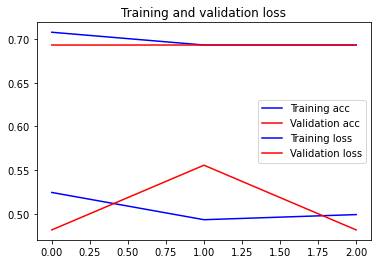

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [16]:
pred = network.predict(test_data)

3/3 [==============================] - 1s 265ms/step


In [17]:
pred  #prob of genuine, prob of forged

array([[0.46757445, 0.5324255 ],
       [0.46759397, 0.532406  ],
       [0.46939304, 0.530607  ],
       [0.4599979 , 0.5400021 ],
       [0.45876873, 0.54123133],
       [0.46015614, 0.53984386],
       [0.4740014 , 0.52599853],
       [0.4612709 , 0.538729  ],
       [0.49003193, 0.5099681 ],
       [0.48656678, 0.5134333 ],
       [0.45497262, 0.5450274 ],
       [0.4757217 , 0.5242783 ],
       [0.46997488, 0.5300252 ],
       [0.45939362, 0.5406064 ],
       [0.48255783, 0.51744217],
       [0.46863052, 0.53136945],
       [0.4623973 , 0.5376027 ],
       [0.44511586, 0.5548841 ],
       [0.5022674 , 0.49773255],
       [0.4786644 , 0.5213356 ],
       [0.4791642 , 0.52083576],
       [0.4837128 , 0.51628715],
       [0.44242188, 0.55757815],
       [0.48314935, 0.51685065],
       [0.4717606 , 0.52823937],
       [0.4713211 , 0.52867895],
       [0.48079142, 0.5192085 ],
       [0.48943302, 0.51056695],
       [0.48276633, 0.51723367],
       [0.51611435, 0.4838857 ],
       [0.

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.9666666666666667

### SIGMOID ACTIVATION FUNCTION

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='sigmoid'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='sigmoid'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'sigmoid'))
network.add(Dropout(rate=0.3)) #143

network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [16]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 3
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/3
513/513 [==============================] - 32s 61ms/step - loss: 0.8040 - accuracy: 0.5068 - val_loss: 0.6958 - val_accuracy: 0.4444
Epoch 2/3
513/513 [==============================] - 31s 60ms/step - loss: 0.7389 - accuracy: 0.4795 - val_loss: 0.6932 - val_accuracy: 0.5556
Epoch 3/3
513/513 [==============================] - 31s 60ms/step - loss: 0.7092 - accuracy: 0.4932 - val_loss: 0.6964 - val_accuracy: 0.5556


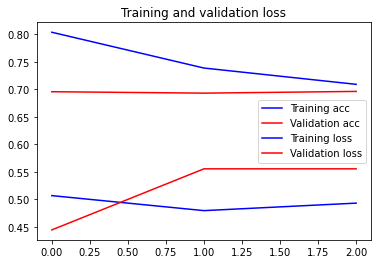

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [21]:
pred = network.predict(test_data)

3/3 [==============================] - 2s 432ms/step


In [22]:
pred  #prob of genuine, prob of forged

array([[0.20489375, 0.79510623],
       [0.20506081, 0.79493916],
       [0.20555085, 0.7944492 ],
       [0.20553173, 0.7944683 ],
       [0.205198  , 0.794802  ],
       [0.20474671, 0.79525334],
       [0.20573635, 0.79426366],
       [0.20513947, 0.7948605 ],
       [0.20536532, 0.7946347 ],
       [0.20477349, 0.7952266 ],
       [0.20484585, 0.7951541 ],
       [0.20563944, 0.7943606 ],
       [0.20506848, 0.79493153],
       [0.20444278, 0.7955572 ],
       [0.20443958, 0.7955604 ],
       [0.20393953, 0.79606044],
       [0.20547824, 0.7945218 ],
       [0.20496613, 0.79503393],
       [0.20532756, 0.7946724 ],
       [0.20608675, 0.79391325],
       [0.20572127, 0.79427874],
       [0.20565046, 0.79434955],
       [0.20583332, 0.7941667 ],
       [0.2045255 , 0.7954745 ],
       [0.20547976, 0.7945202 ],
       [0.20509708, 0.7949029 ],
       [0.20497577, 0.7950243 ],
       [0.20618285, 0.79381716],
       [0.20535563, 0.7946444 ],
       [0.20481262, 0.79518735],
       [0.

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

1.0

### TANH ACTIVATION FUNCTION

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def tanh(x):
    return np.tanh(x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='tanh'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='tanh'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'tanh'))
network.add(Dropout(rate=0.3)) #143

network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [22]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 4
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/4
513/513 [==============================] - 32s 61ms/step - loss: 1.0190 - accuracy: 0.4951 - val_loss: 0.6938 - val_accuracy: 0.4444
Epoch 2/4
513/513 [==============================] - 31s 61ms/step - loss: 0.7550 - accuracy: 0.5107 - val_loss: 0.6961 - val_accuracy: 0.5556
Epoch 3/4
513/513 [==============================] - 31s 61ms/step - loss: 0.7267 - accuracy: 0.4288 - val_loss: 0.6933 - val_accuracy: 0.5556
Epoch 4/4
513/513 [==============================] - 31s 61ms/step - loss: 0.7052 - accuracy: 0.4893 - val_loss: 0.6951 - val_accuracy: 0.5556


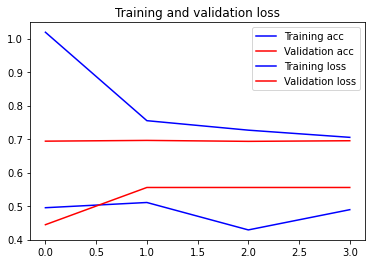

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [24]:
pred = network.predict(test_data)

In [25]:
pred

array([[0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.53128713, 0.46871284],
       [0.

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

<hr>